In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [270]:
data = pd.read_excel("C:/Users/Toshiba/Desktop/O_C_Cmaterial/Datasets/ANZ synthesised transaction dataset.xlsx")

In [265]:
data.head(3)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
status               12043 non-null object
card_present_flag    7717 non-null float64
bpay_biller_code     885 non-null object
account              12043 non-null object
currency             12043 non-null object
long_lat             12043 non-null object
txn_description      12043 non-null object
merchant_id          7717 non-null object
merchant_code        883 non-null float64
first_name           12043 non-null object
balance              12043 non-null float64
date                 12043 non-null datetime64[ns]
gender               12043 non-null object
age                  12043 non-null int64
merchant_suburb      7717 non-null object
merchant_state       7717 non-null object
extraction           12043 non-null object
amount               12043 non-null float64
transaction_id       12043 non-null object
country              12043 non-null object
customer_id          12043 n

In [67]:
data.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


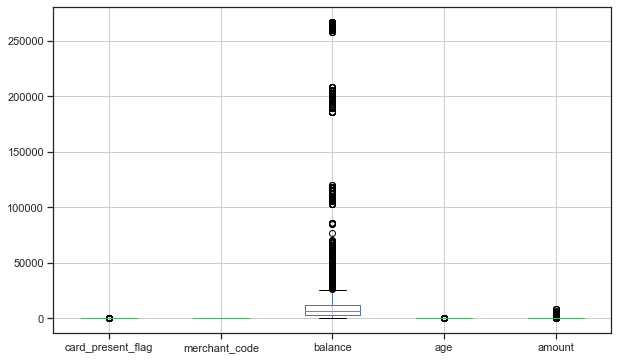

In [68]:
plt.figure(figsize=(10,6))
pd.DataFrame.boxplot(data)

debit     0.926679
credit    0.073321
Name: movement, dtype: float64

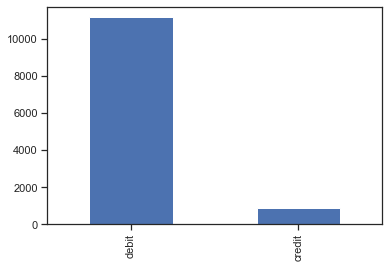

In [69]:
data['movement'].value_counts().plot.bar()
data['movement'].value_counts()/len(data['movement'])

NSW    0.180105
VIC    0.176949
QLD    0.129204
WA     0.091339
SA     0.034460
NT     0.017022
ACT    0.006062
TAS    0.005646
Name: merchant_state, dtype: float64

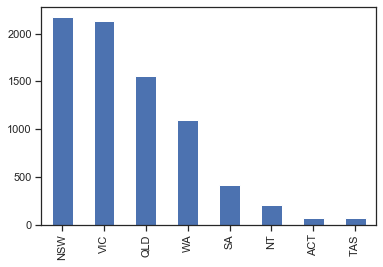

In [70]:
data['merchant_state'].value_counts().plot.bar()
data['merchant_state'].value_counts()/len(data['merchant_state'])

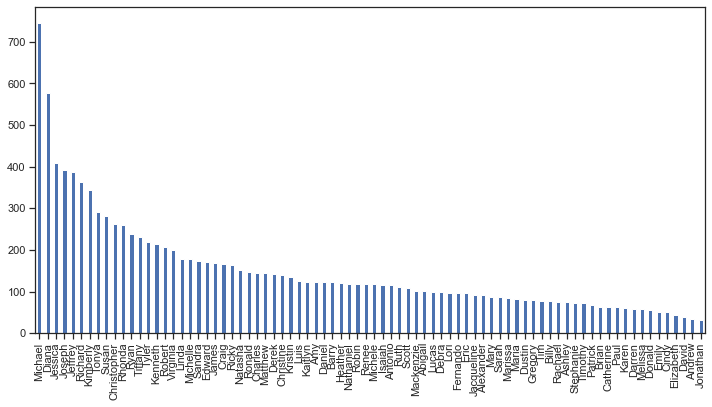

In [71]:
plt.figure(figsize=(12,6))
data['first_name'].value_counts().plot.bar()

1.0    0.514324
0.0    0.126464
Name: card_present_flag, dtype: float64

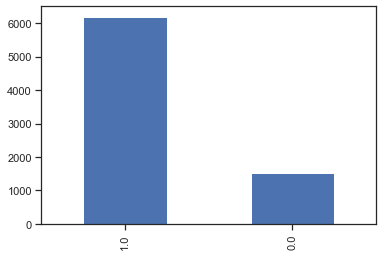

In [72]:
data['card_present_flag'].value_counts().plot.bar()
data['card_present_flag'].value_counts()/len(data['card_present_flag'])

In [96]:
data.corr()

,card_present_flag,merchant_code,balance,age,amount
card_present_flag,1.000000,NaN,0.005925,-0.008405,-0.002074
merchant_code,NaN,NaN,NaN,NaN,NaN
balance,0.005925,NaN,1.000000,0.199329,0.059178
age,-0.008405,NaN,0.199329,1.000000,0.029980
amount,-0.002074,NaN,0.059178,0.029980,1.000000


In [75]:
data.isnull().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

In [76]:
bool_series = pd.notnull(data["card_present_flag"])  
#bool_series.head(3)

In [229]:
#Checking if 100 unique account values are there or not
new_data["account"].nunique()

100

In [77]:
data[bool_series]

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit
6,authorized,1.0,NaN,ACC-2776252858,AUD,144.95 -37.76,SALES-POS,3aa18033-a0a9-4190-a117-b7caaf4d07e3,NaN,Kristin,...,43,Kalkallo,VIC,2018-08-01T02:23:04.000+0000,61.06,b79ca208099c4c28aa5dae966096d842,Australia,CUS-4123612273,144.95 -37.53,debit
7,authorized,1.0,NaN,ACC-2776252858,AUD,144.95 -37.76,POS,ee58145d-26e8-4b01-9cd9-62378014f21d,NaN,Kristin,...,43,Melbourne,VIC,2018-08-01T04:11:25.000+0000,15.61,e1c4a50d6a0549cbb3710a62a2fa00d5,Australia,CUS-4123612273,144.96 -37.81,debit
8,authorized,1.0,NaN,ACC-182446574,AUD,116.06 -32.00,POS,cfbf535e-caa8-499f-9d41-bbdc2b836d85,NaN,Tonya,...,27,Yokine,WA,2018-08-01T04:40:00.000+0000,19.25,799e39eb2c1b411185424b0f2cd18bda,Australia,CUS-3026014945,115.85 -31.9,debit
12,authorized,1.0,NaN,ACC-182446574,AUD,116.06 -32.00,SALES-POS,33952b07-859c-4c0a-8b1d-813a5f6b444c,NaN,Tonya,...,27,Cockburn Central,WA,2018-08-01T06:06:40.000+0000,6.08,9ba4928260b24fbb8fb00f1f8d86b868,Australia,CUS-3026014945,115.86 -32.13,debit
15,authorized,1.0,NaN,ACC-1903037542,AUD,153.05 -27.61,POS,d920de7f-959c-4d9a-aee5-930689a2f8cd,NaN,Jeffrey,...,30,Mount Ommaney,QLD,2018-08-01T07:20:48.000+0000,10.79,28347ba260d84f8d81ab70d9e901ea8e,Australia,CUS-860700529,152.94 -27.55,debit


In [107]:
#drop a columns which have at least 1 missing values
new_data= data.dropna(axis=1)

M    0.52188
F    0.47812
Name: gender, dtype: float64

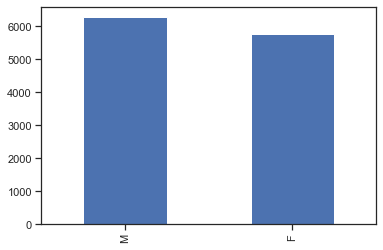

In [110]:
new_data['gender'].value_counts().plot.bar()
new_data['gender'].value_counts()/len(data['gender'])

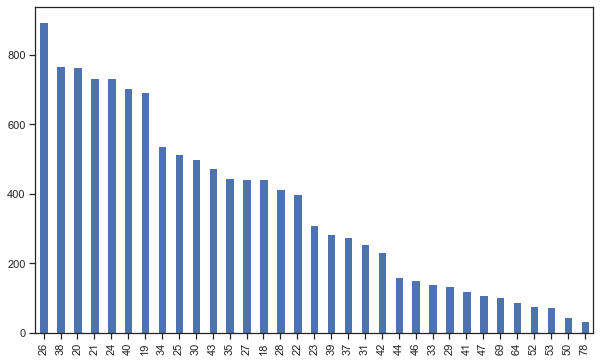

In [189]:
plt.figure(figsize=(10,6))
new_data['age'].value_counts().plot.bar()

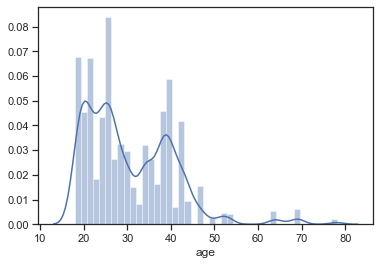

In [190]:
sns.distplot(new_data['age'])

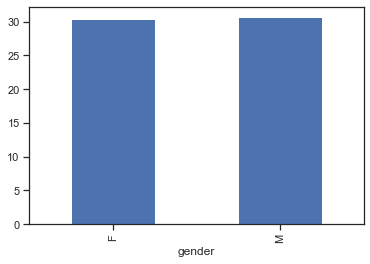

In [117]:
data.groupby('gender')['age'].mean().plot.bar()

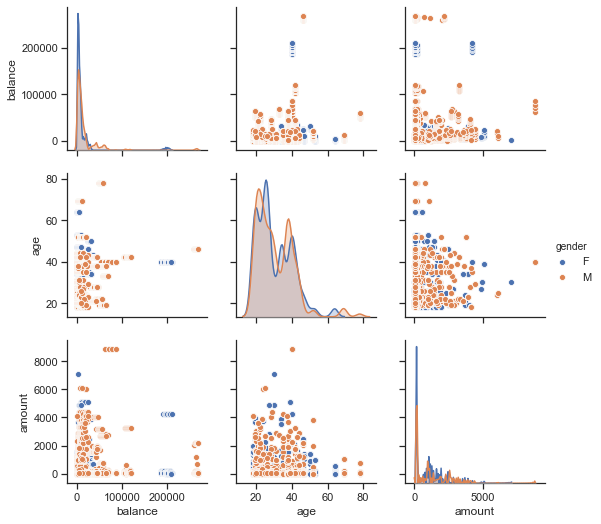

In [112]:
sns.pairplot(new_data, hue='gender')

In [113]:
new_data.corr()

,balance,age,amount
balance,1.000000,0.199329,0.059178
age,0.199329,1.000000,0.029980
amount,0.059178,0.029980,1.000000


In [114]:
data['age'].corr(data['balance'])

0.19932925225498485

In [119]:
from scipy.stats import ttest_ind
M = data[data['gender']=='M']
F = data[data['gender']=='F']
ttest_ind(M['age'], F['age'])

Ttest_indResult(statistic=1.271202645962589, pvalue=0.20368112123883073)

here p value > 0.05 it means mean o male and female is statistically same

In [123]:
#removing AUC and CUS tag in account and coustomer id acolumn in order to convert them in numeric data
new_data.account = new_data.account.str.slice(4,)
new_data.customer_id = new_data.customer_id.str.slice(4,)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [126]:
#  split of longitude and latitude
new_data['long'] = new_data.long_lat.str.slice(0,6)
new_data['lat'] = new_data.long_lat.str.slice(7,13)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [132]:
try:
    new_data["account"] = new_data["account"].astype(float)                       #
    new_data["customer_id"] = new_data["customer_id"].astype(float)
    new_data["long"] = new_data["long"].astype(float)
    new_data["lat"] = new_data["lat"].astype(float)
    new_data["long_lat"]= new_data["long_lat"].astype(float) 
except ValueError:
        print("value error on conversion")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

value error on conversion


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [235]:
#Taking the sum of all transactions over the dates

date_group = new_data.groupby('date')["amount"].sum().reset_index()

In [236]:
date_group.head(3)

,date,amount
0,2018-08-01,29867.94
1,2018-08-02,21786.32
2,2018-08-03,38096.58


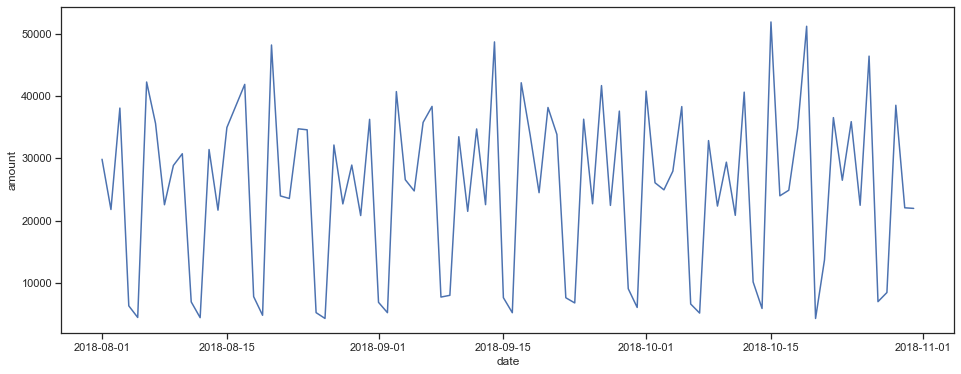

In [232]:
#Lineplot of the entire data
plt.figure(figsize=(16, 6))
sns.lineplot(y="amount",x="date",data=date_group)

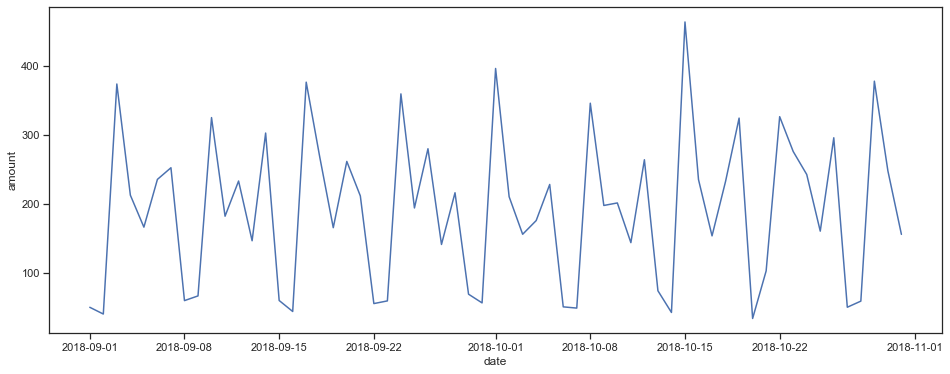

In [237]:
#Mean transaction amount per day

date_mean = data.groupby("date")["amount"].mean().reset_index()
plt.figure(figsize=(16, 6))
sns.lineplot(y="amount",x="date",data=date_mean)

In [258]:
date_mean['amount'].max()

463.7775000000001

In [259]:
date_mean['amount'].min()

33.85404761904762

In [144]:
new_data['date'].min()

Timestamp('2018-08-01 00:00:00')

In [143]:
new_data['date'].max()

Timestamp('2018-10-31 00:00:00')

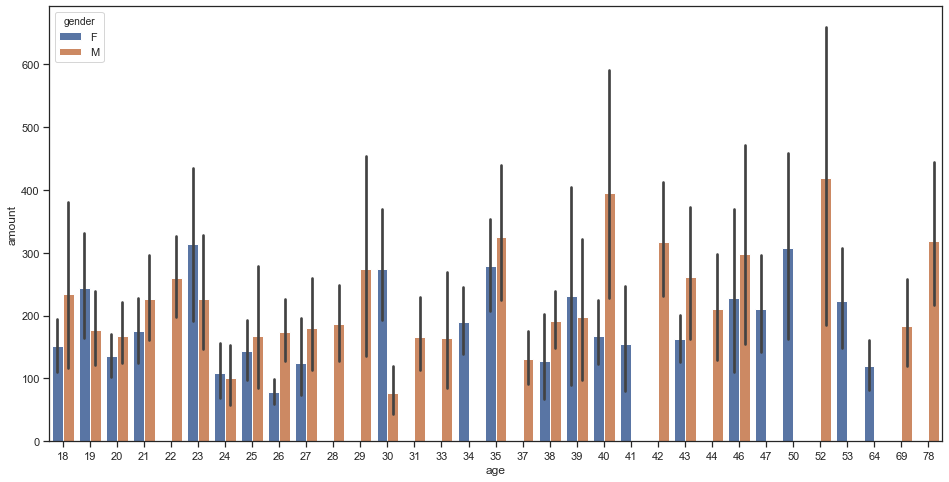

In [246]:
plt.figure(figsize=(16, 8))
sns.barplot(y="amount", x="age", hue="gender" ,data=gender_vol)

In [257]:
gender_vol['amount'].max()

8835.98

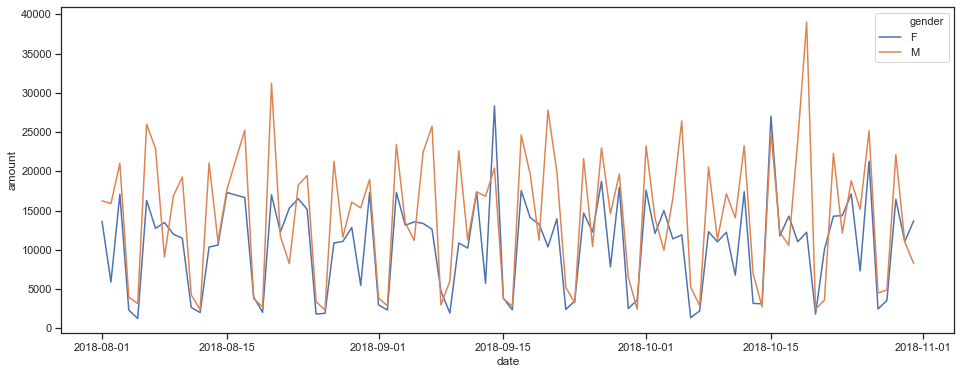

In [244]:
#Transaction volume over the dates by gender

gender_vol = new_data[["date","amount","gender",'age']]

gender_data = gender_vol.groupby(['date',"gender"])["amount"].sum().reset_index()

plt.figure(figsize=(16, 6))
sns.lineplot(y="amount",x="date",hue="gender",data=gender_data)

In [145]:
# three months are given in data August,September,October 
aug_data = new_data.loc[(new_data['date'] < '2018-09-01') & (new_data['date']>'2018-08-01'),['status','txn_description','date','amount','balance'] ]
sep_data = new_data.loc[(new_data['date'] < '2018-10-01') & (new_data['date']>'2018-08-31'),['status','txn_description','date','amount','balance'] ]
oct_data = new_data.loc[(new_data['date'] < '2018-11-01') & (new_data['date']>'2018-08-31'),['status','txn_description','date','amount','balance'] ]

In [200]:
new_data.head(4)

,status,account,currency,long_lat,txn_description,first_name,balance,date,gender,age,...,amount,transaction_id,country,customer_id,movement,long,lat,month_name,weekday,date_of_trans
0,authorized,1.598451e+09,AUD,153.41 -27.95,POS,Diana,35.39,2018-08-01,F,26,...,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,2.487425e+09,debit,153.41,-27.95,August,Wed,1
1,authorized,1.598451e+09,AUD,153.41 -27.95,SALES-POS,Diana,21.20,2018-08-01,F,26,...,14.19,13270a2a902145da9db4c951e04b51b9,Australia,2.487425e+09,debit,153.41,-27.95,August,Wed,1
2,authorized,1.222301e+09,AUD,151.23 -33.94,POS,Michael,5.71,2018-08-01,M,38,...,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,2.142601e+09,debit,151.23,-33.94,August,Wed,1
3,authorized,1.037051e+09,AUD,153.10 -27.66,SALES-POS,Rhonda,2117.22,2018-08-01,F,40,...,40.90,2698170da3704fd981b15e64a006079e,Australia,1.614227e+09,debit,153.10,-27.66,August,Wed,1


In [194]:
# extract start month name
new_data['month_name']=new_data['date'].dt.strftime('%B')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [197]:
# extract weekdays
new_data['weekday']=new_data['date'].dt.strftime('%a')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


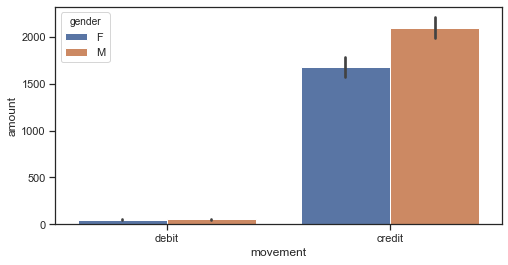

In [250]:
plt.figure(figsize=(8,4))
sns.barplot(y="amount", x="movement", hue="gender", data=new_data)

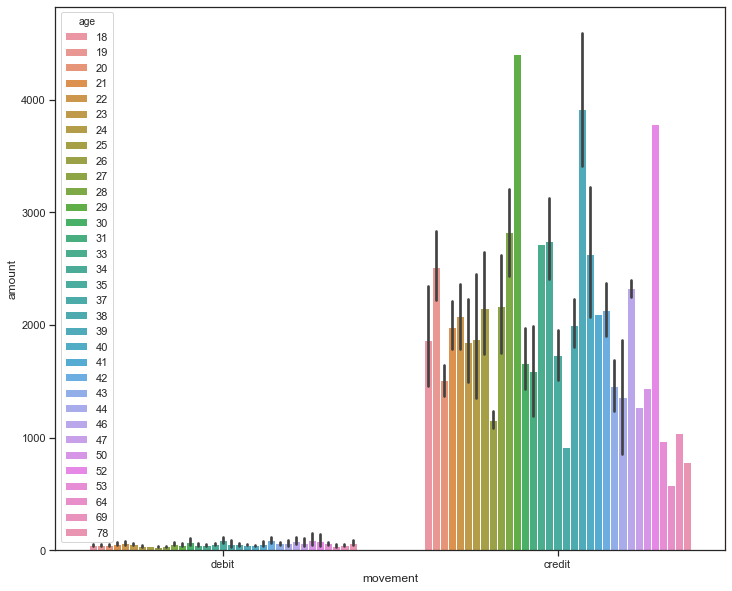

In [253]:
plt.figure(figsize=(12,10))
sns.barplot(y="amount", x="movement", hue="age", data=new_data)

In [136]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 18 columns):
status             12043 non-null object
account            12043 non-null float64
currency           12043 non-null object
long_lat           12043 non-null object
txn_description    12043 non-null object
first_name         12043 non-null object
balance            12043 non-null float64
date               12043 non-null datetime64[ns]
gender             12043 non-null object
age                12043 non-null int64
extraction         12043 non-null object
amount             12043 non-null float64
transaction_id     12043 non-null object
country            12043 non-null object
customer_id        12043 non-null float64
movement           12043 non-null object
long               12043 non-null float64
lat                12043 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(1), object(10)
memory usage: 1.7+ MB


In [199]:
# extract date from date column
new_data['date_of_trans']=new_data['date'].dt.day.astype(int)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [129]:
new_data.isnull().sum()

status             0
account            0
currency           0
long_lat           0
txn_description    0
first_name         0
balance            0
date               0
gender             0
age                0
extraction         0
amount             0
transaction_id     0
country            0
customer_id        0
movement           0
long               0
lat                0
dtype: int64

Text(0.5, 1.0, 'August Data')

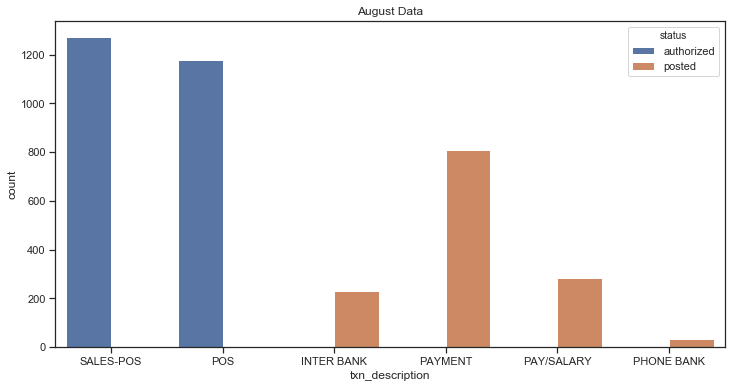

In [148]:
plt.figure(figsize=(12,6))
sns.countplot(x='txn_description',hue='status',data=aug_data).set_title("August Data")

Text(0.5, 1.0, 'September Data')

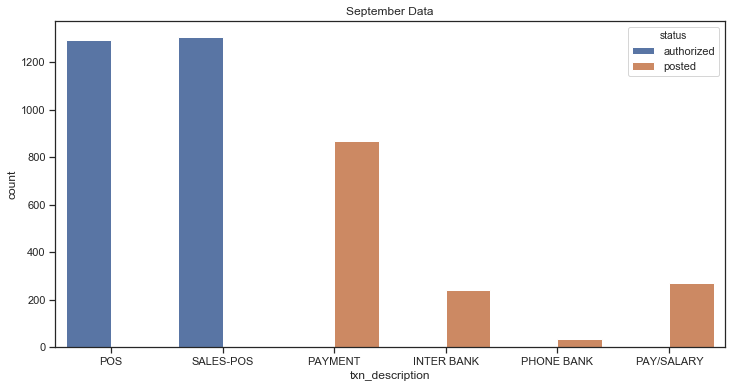

In [149]:
fig, ax = plt.subplots(figsize=(12,6))
sns.countplot(x='txn_description',hue='status',data=sep_data,ax=ax).set_title("September Data")

Text(0.5, 1.0, 'October Data')

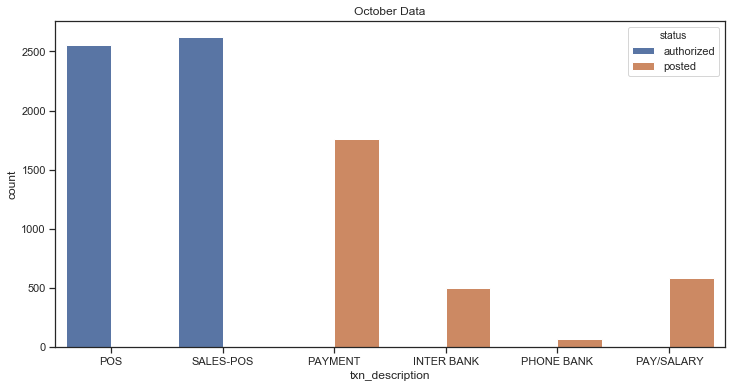

In [192]:
fig, ax = plt.subplots(figsize=(12,6))
sns.countplot(x='txn_description',hue='status',data=oct_data,ax=ax).set_title("October Data")

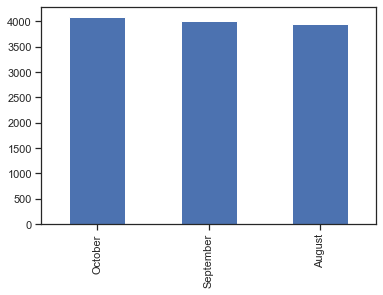

In [202]:
new_data.month_name.value_counts().plot.bar()

Text(0.5, 0, 'date_transaction')

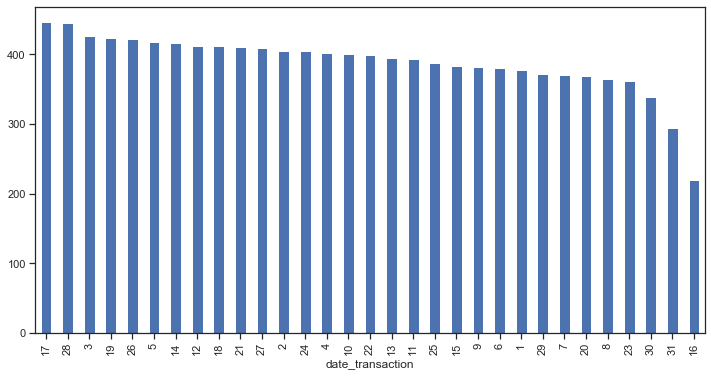

In [206]:
plt.figure(figsize=(12,6))
new_data.date_of_trans.value_counts().plot.bar()
plt.xlabel('date_transaction')

In [207]:
# total amount of transaction done on 17th of every month
new_data[new_data['date_of_trans']==17].amount.sum()

108962.29000000001

In [151]:
oct_data['amount'].count()

8100

In [210]:
new_data[new_data['date_of_trans']==17].amount.describe()

count     446.000000
mean      244.310067
std       666.309631
min         2.630000
25%        17.175000
50%        35.190000
75%        83.000000
max      4405.300000
Name: amount, dtype: float64

In [211]:
new_data[new_data['date_of_trans']==16].amount.describe()

count     220.000000
mean      132.636273
std       448.327685
min         3.670000
25%        16.275000
50%        28.000000
75%        47.367500
max      4132.230000
Name: amount, dtype: float64

In [152]:
aug_avg_amt = aug_data['amount'].sum()/3806
sep_avg_amt = sep_data['amount'].sum()/4013
oct_avg_amt = oct_data['amount'].sum()/8100

aug_mx_amt = aug_data['amount'].idxmax()
sep_mx_amt = sep_data['amount'].idxmax()
oct_mx_amt = oct_data['amount'].max()

aug_mn_amt = aug_data['amount'].min()
sep_mn_amt = sep_data['amount'].min()
oct_mn_amt = oct_data['amount'].min()

print(aug_mx_amt)
print(sep_mx_amt)
print(oct_mx_amt)

print(aug_mn_amt)
print(sep_mn_amt)
print(oct_mn_amt)

print(aug_avg_amt)
print(sep_avg_amt)
print(oct_avg_amt)

2401
6529
8835.98
1.52
0.1
0.1
183.9378822911193
182.04590331422878
189.30230617283954


In [260]:
aug_avg_blc = aug_data['balance'].sum()/3806
sep_avg_blc = sep_data['balance'].sum()/4013
oct_avg_blc = oct_data['balance'].sum()/8100

aug_max_blc = aug_data['balance'].max()
sep_max_blc = sep_data['balance'].max()
oct_max_blc = oct_data['balance'].max()

aug_min_blc = aug_data['balance'].min()
sep_min_blc = sep_data['balance'].min()
oct_min_blc = oct_data['balance'].min()

print(aug_max_blc)
print(sep_max_blc)
print(oct_max_blc)

print(aug_min_blc)
print(sep_min_blc)
print(oct_min_blc)

print(aug_avg_blc)
print(sep_avg_blc)
print(oct_avg_blc)

262153.86
264519.11
267128.52
0.24
0.98
0.98
10825.111242774567
14730.151136307004
16607.56778271605


In [157]:
# average transaction in august

aug_avg_txn = aug_data['amount'].count()/31
sep_avg_txn = sep_data['amount'].count()/30
oct_avg_txn = oct_data['amount'].count()/31

print(aug_avg_txn)
print(sep_avg_txn)
print(oct_avg_txn)

122.7741935483871
133.76666666666668
261.2903225806452


Text(0.5, 0.98, 'Day wise transaction')

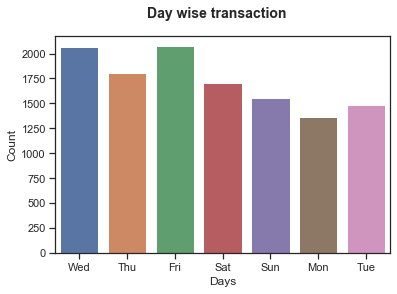

In [215]:
# Bar graph for the no. of transaction occured on particular days

sns.countplot(data=new_data, x='weekday')
plt.xlabel('Days');
plt.ylabel('Count');
plt.suptitle('Day wise transaction', fontsize=14, fontweight='semibold')

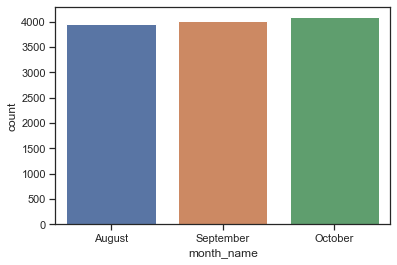

In [217]:
sns.countplot(data=new_data, x='month_name')

Text(0.5, 0.98, 'Gender wise transaction')

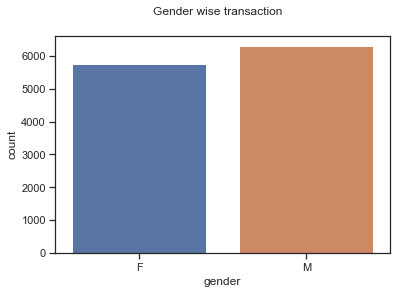

In [223]:
# Bar graph for the no. of transaction occured as per gender
sns.countplot(data=new_data, x='gender')
plt.suptitle('Gender wise transaction', fontsize=12)

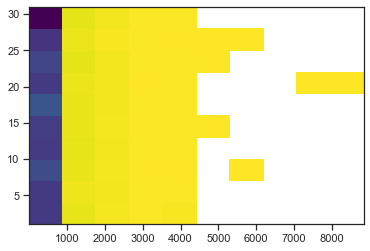

In [227]:
# ouliers present in amount which can bend avg. value.
plt.hist2d(data=new_data,x='amount',y='date_of_trans',cmin=0.5,cmap='viridis_r');

In [212]:
new_data.head(3)

,status,account,currency,long_lat,txn_description,first_name,balance,date,gender,age,...,amount,transaction_id,country,customer_id,movement,long,lat,month_name,weekday,date_of_trans
0,authorized,1.598451e+09,AUD,153.41 -27.95,POS,Diana,35.39,2018-08-01,F,26,...,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,2.487425e+09,debit,153.41,-27.95,August,Wed,1
1,authorized,1.598451e+09,AUD,153.41 -27.95,SALES-POS,Diana,21.20,2018-08-01,F,26,...,14.19,13270a2a902145da9db4c951e04b51b9,Australia,2.487425e+09,debit,153.41,-27.95,August,Wed,1
2,authorized,1.222301e+09,AUD,151.23 -33.94,POS,Michael,5.71,2018-08-01,M,38,...,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,2.142601e+09,debit,151.23,-33.94,August,Wed,1


In [169]:
aug_date = new_data.loc[(new_data['date'] < '2018-09-01') & (new_data['date']>'2018-08-01'),['date','status','txn_description' ]]
aug_date.head(5)

,date,status,txn_description
137,2018-08-02,authorized,SALES-POS
138,2018-08-02,authorized,SALES-POS
139,2018-08-02,authorized,POS
140,2018-08-02,authorized,SALES-POS
141,2018-08-02,posted,INTER BANK


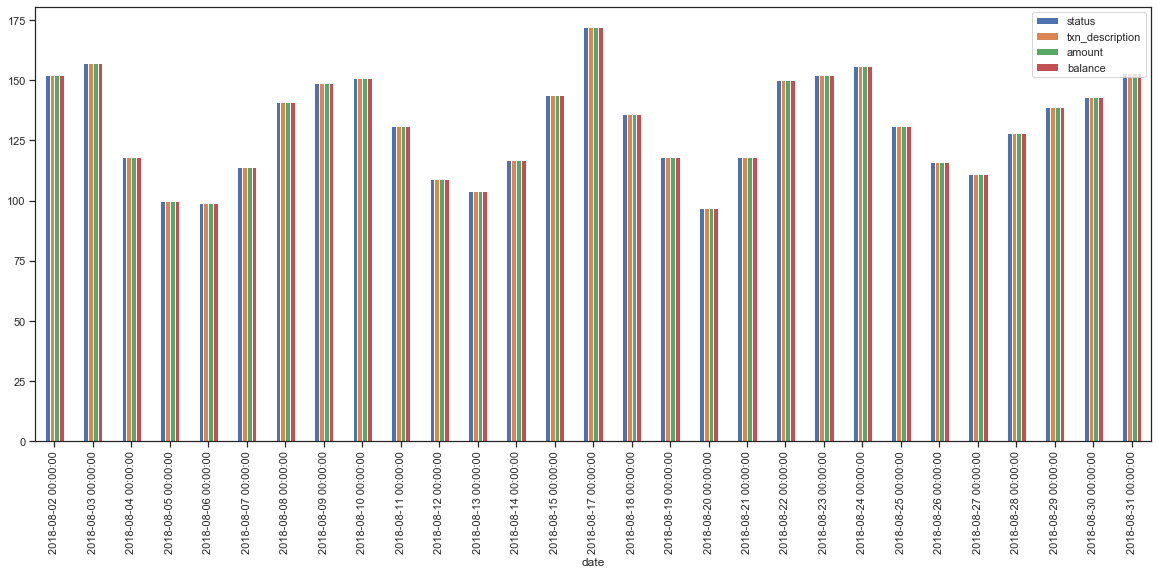

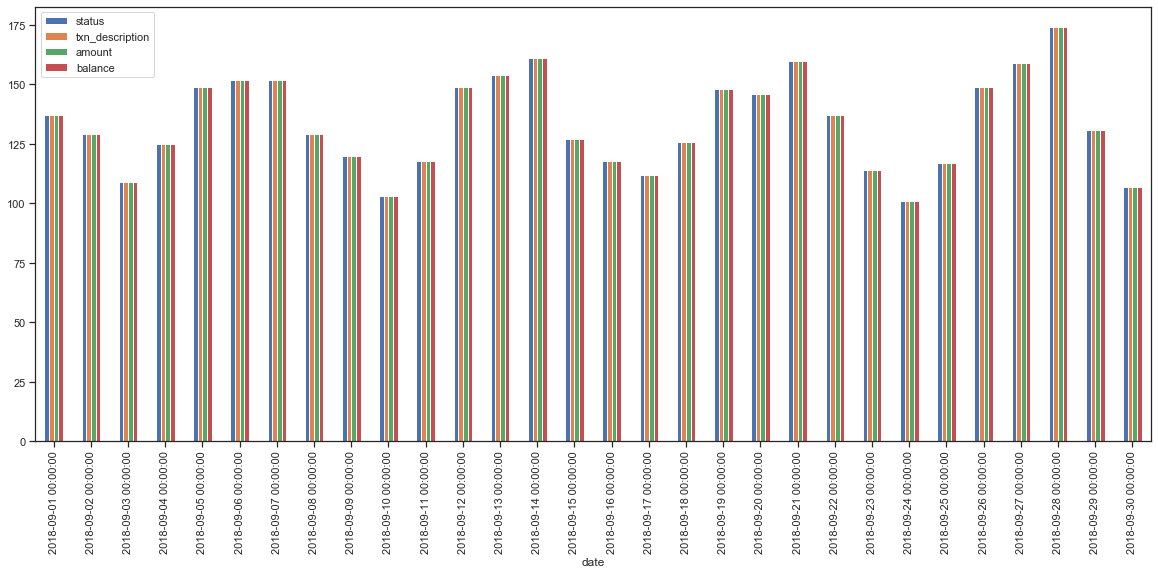

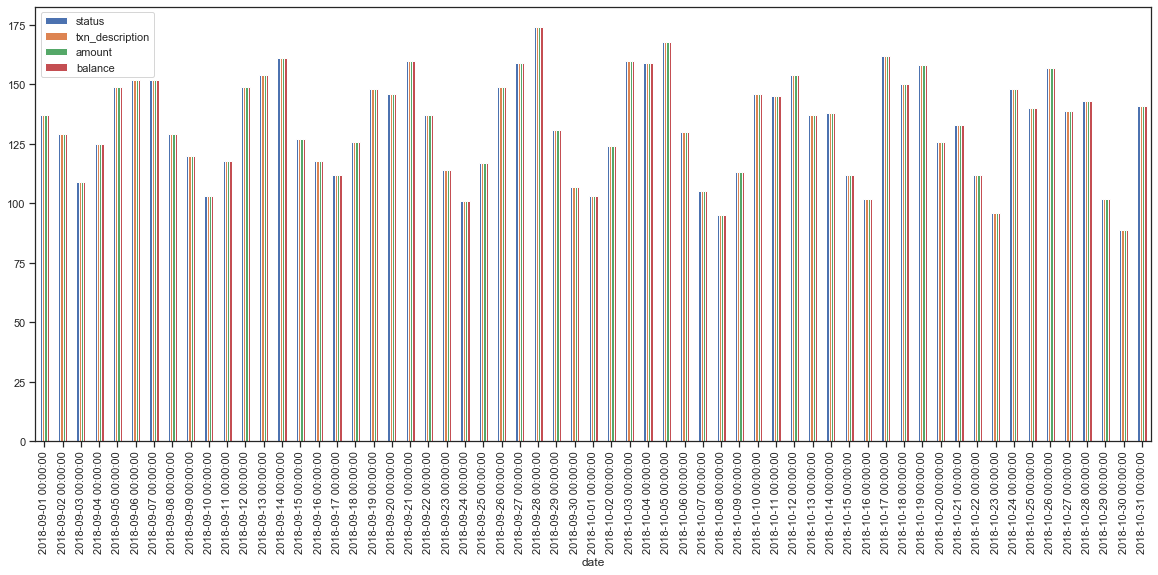

In [172]:
month_list = [aug_data,sep_data,oct_data]
for data in month_list:
    data.groupby(data['date']).count().plot(kind="bar",figsize=(20,8))

In [255]:
new_data[["long", "lat"]] = new_data[["long", "lat"]].apply(pd.to_numeric)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


# task 2

In [261]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [271]:
data_2 = data[["customer_id","age","txn_description","balance","amount"]]

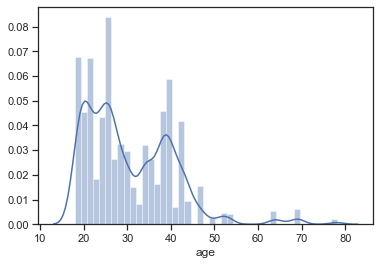

In [282]:
sns.distplot(data_2['age'])

In [272]:
data_2.head(3)

,customer_id,age,txn_description,balance,amount
0,CUS-2487424745,26,POS,35.39,16.25
1,CUS-2487424745,26,SALES-POS,21.20,14.19
2,CUS-2142601169,38,POS,5.71,6.42


In [273]:
data.head(2)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit


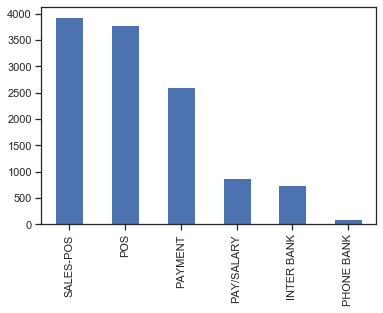

In [289]:
data['txn_description'].value_counts().plot.bar()

In [275]:
data['merchant_state'].value_counts()

NSW    2169
VIC    2131
QLD    1556
WA     1100
SA      415
NT      205
ACT      73
TAS      68
Name: merchant_state, dtype: int64

In [279]:
data_3 = pd.get_dummies(data['merchant_state'])
data_3.head()
data_3.isnull().sum()

ACT    0
NSW    0
NT     0
QLD    0
SA     0
TAS    0
VIC    0
WA     0
dtype: int64

In [280]:
data_4 = pd.get_dummies(data['movement'])
data_4.head()

,credit,debit
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [281]:
data_5 = pd.get_dummies(data['status'])
data_5.head()

,authorized,posted
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [292]:
data_6 = pd.get_dummies(data['txn_description'])

In [293]:
data_m= pd.concat([data_2,data_3,data_4,data_5,data_6], axis=1, join='inner')

In [297]:
data_m.head(3)

,customer_id,age,balance,amount,ACT,NSW,NT,QLD,SA,TAS,...,credit,debit,authorized,posted,INTER BANK,PAY/SALARY,PAYMENT,PHONE BANK,POS,SALES-POS
0,CUS-2487424745,26,35.39,16.25,0,0,0,1,0,0,...,0,1,1,0,0,0,0,0,1,0
1,CUS-2487424745,26,21.20,14.19,0,1,0,0,0,0,...,0,1,1,0,0,0,0,0,0,1
2,CUS-2142601169,38,5.71,6.42,0,1,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0


In [296]:
del data_m["txn_description"]

In [290]:
salary=data[data["txn_description"]=="PAY/SALARY"].groupby("customer_id").mean().reset_index()
salary=salary[["customer_id","amount"]]
salary=salary.rename(columns = {'amount':'salary'})

In [291]:
salary.head(3)

,customer_id,salary
0,CUS-1005756958,970.47
1,CUS-1117979751,3578.65
2,CUS-1140341822,1916.51


### Customer Segmentation using KMeans Clustering

In [305]:
data_m.shape

(12043, 21)

In [306]:
#Trying K from 1 to 11

k =[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(X)
    k.append(kmeans.inertia_)

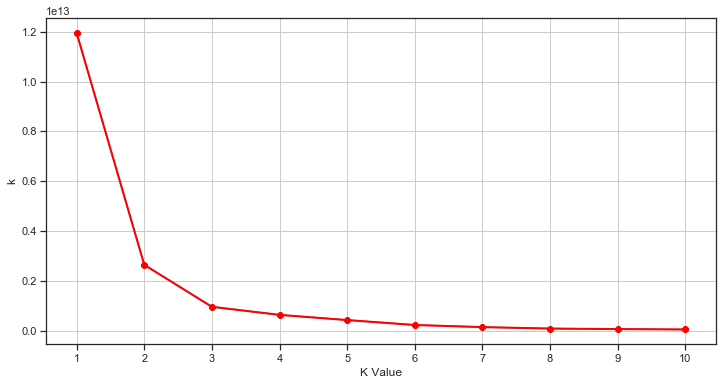

In [309]:
#The elbow curve

plt.figure(figsize=(12,6))
plt.plot(range(1,11),k)
plt.grid()
plt.plot(range(1,11),k, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("k")
plt.show()

In [311]:
# The elbow is at K=3

km=KMeans(n_clusters=3)
clusters = km.fit_predict(X)
data_m["label"] = clusters

In [318]:
f = data_m[data_m["label"]==0]

In [312]:
data_m.head(2)

,age,balance,amount,ACT,NSW,NT,QLD,SA,TAS,VIC,...,debit,authorized,posted,INTER BANK,PAY/SALARY,PAYMENT,PHONE BANK,POS,SALES-POS,label
0,26,35.39,16.25,0,0,0,1,0,0,0,...,1,1,0,0,0,0,0,1,0,0
1,26,21.20,14.19,0,1,0,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0


In [319]:
s = data_m[data_m["label"]==1]

In [320]:
t = data_m[data_m["label"]==2]

In [329]:
f.head(2)

,age,balance,amount,ACT,NSW,NT,QLD,SA,TAS,VIC,...,debit,authorized,posted,INTER BANK,PAY/SALARY,PAYMENT,PHONE BANK,POS,SALES-POS,label
0,26,35.39,16.25,0,0,0,1,0,0,0,...,1,1,0,0,0,0,0,1,0,0
1,26,21.20,14.19,0,1,0,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0


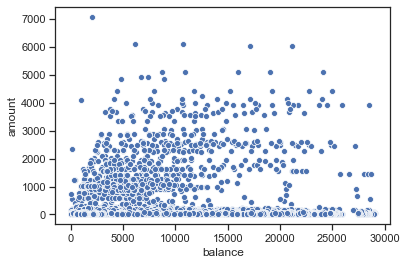

In [339]:
sns.scatterplot('balance', 'amount', data=f)

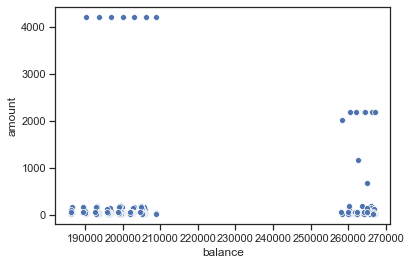

In [341]:
sns.scatterplot('balance', 'amount',  data=s)

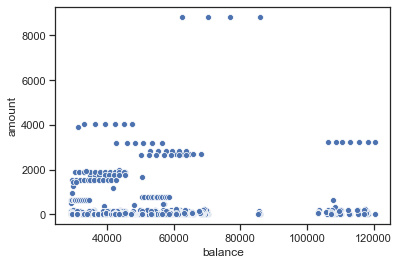

In [340]:
sns.scatterplot('balance', 'amount',  data=t)

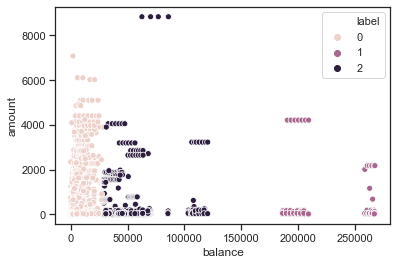

In [348]:
sns.scatterplot('balance', 'amount', hue='label', data=data_m)

In [346]:
data_m.head(2)

,age,balance,amount,ACT,NSW,NT,QLD,SA,TAS,VIC,...,debit,authorized,posted,INTER BANK,PAY/SALARY,PAYMENT,PHONE BANK,POS,SALES-POS,label
0,26,35.39,16.25,0,0,0,1,0,0,0,...,1,1,0,0,0,0,0,1,0,0
1,26,21.20,14.19,0,1,0,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0
